Пусть задан алгоритм прогноза (функция logistic_regression), принимающий на вход вектор данных и вес. Кроме этого задана функция ошибки ([кросс-энтропия](https://alexanderdyakonov.wordpress.com/2018/03/12/%D0%BB%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F-%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F-%D0%BE%D1%88%D0%B8%D0%B1%D0%BA%D0%B8/#:~:text=logloss%2D%D0%BE%D1%88%D0%B8%D0%B1%D0%BA%D0%B0%20%D0%BD%D0%B0%20%D0%BE%D0%B4%D0%BD%D0%BE%D0%BC%20%D0%BE%D0%B1%D1%8A%D0%B5%D0%BA%D1%82%D0%B5,1%2C%20%D1%82%D0%BE%20%D0%BE%D1%88%D0%B8%D0%B1%D0%BA%D0%B0%20%D1%80%D0%B0%D0%B2%D0%BD%D0%B0%20%D0%B1%D0%B5%D1%81%D0%BA%D0%BE%D0%BD%D0%B5%D1%87%D0%BD%D0%BE%D1%81%D1%82%D0%B8!)), принимающая на вход а - прогноз алгоритма и y - реальный ответ. В списке data содержатся вектора на вход. На соответсвующих позициях в списке y содержится разметка (ответы) для этих векторов.

Вам нужно получить прогнозы алгоритма для каждой точки в data и сравнить их с ответами используя функцию ошибки cost. Полученные ошибки для всех точек усреднить (найти среднее арифметическое), отобразить на экран с точностью до 4 знака.

Для примера, отображение 0.65392773 с  точностью до 4 можно произвести так:

print('ошибка', round(0.65392773, 4))

Или через f строку (предпочтительно):

f'ошибка {0.65392773:.4f}'

__Sample Input:__

0.9 0.9;1. 0.9;0.95 1.;0.92 0.85;0.2 0.15;0.13 0.14;0.32 0.2;0.1 0.5|1,1,1,1,0,0,0,0

__Sample Output:__

0.6887

In [23]:
from math import log
import numpy as np
# данные
data, y = input().split('|')
data = [list(map(float, e.split())) for e in data.split(';')]
# ответы
y = list(map(int, y.split(',')))
# лог регрессия
e = 2.71828182846
sigmoid = lambda x: 1/(1+e**(-x))
logistic_regression = lambda data, w=[0.2, -0.2]: sigmoid(sum([data[i]*w[i] for i in range(len(data))]))
# функция потерь (ошибка, она же кросс-энтропия)
cost = lambda a, y: -y * log(a + 1e-5)- (1-y) * log( 1-a + 1e-5)

# ваш код тут
a = [logistic_regression(i) for i in data]
avg_loss = sum(cost(*i) for i in zip(a, y))/len(data)

# Не меняйте этот код! Он необходим для автоматической проверки решений.
print(f'{avg_loss: .4f}')

0.9 0.9;1. 0.9;0.95 1.;0.92 0.85;0.2 0.15;0.13 0.14;0.32 0.2;0.1 0.5|1,1,1,1,0,0,0,0
 0.6887


Одной из ключевых операций в обучении большинства алгоритмов машинного обучения является скалярное произведение векторов. Система подставляет в переменные a, b списки, состоящие из float. Найти скалярное произведение dd векторов:

<center>d = $\sum_{i=1}^{n}a_{i} \cdot b_{i}$

Размеры векторов должны совпадать: n = len(a) = len(b)

В случае, если они не совпадают - вывести "error".

 

Примечание: в ответах используется float (т.е. ответ 2 и 2.0 система будет считать разными ответами).

Подробнее о векторах и геометрической интуиции операций с ними (+ матрицами) можно посмотреть в этой серии видео. Отметим, что имея эту интуицию воспринимать матричную нотацию при изучении алгоритмов машинного обучения будет гораздо проще!

__Sample Input:__

1 2 3 4 5|1 2 3 4

__Sample Output:__

error

In [78]:
# Не меняйте этот код! Он необходим для автоматической проверки решений.
a, b = input().split('|')
a = list(map(float, a.split()))
b = list(map(float, b.split()))

# изменяйте только этот код
print(sum([x * y for x, y in zip(a, b)]) if len(a) == len(b) else 'error')

1 2 3 4 5|1 2 3 4 6
60.0


В последней задаче блока 1.5 Вы уже реализовывали логистическую регрессию. Она является скалярным произведением вектора входов (х = [1, 2, 3] - данные, задаваемые своими признаковыми описаниями - позицией в векторе) и вектора весов нейрона (w = [0.1, -0.2, 3.14] - веса, смещение b уже включено на нулевой позиции):

<center>$z = \vec{w} \cdot \vec{x} = 1*0.1 + 2*(-0.2) + 3*3.14 = 9.12$

Скалярное произведение проводится через функцию активации, в лог. регрессии это сигмоида:

<center>$\sigma(z) = \frac{1}{1+e^{-z}} \approx 0.999890$

Слой нейросети есть композиция  (независимо работающие друг от друга) таких логистических регрессий с разными весами (это справедливо, когда функция активации слоя - сигмоида).

По сути вектор входных данных (список) скалярно умножается на вектор весов (список) каждого нейрона $\vec{x} * \vec{w_j}$. Эту операцию можно компактно реализовать в виде матрично-векторного умножения:

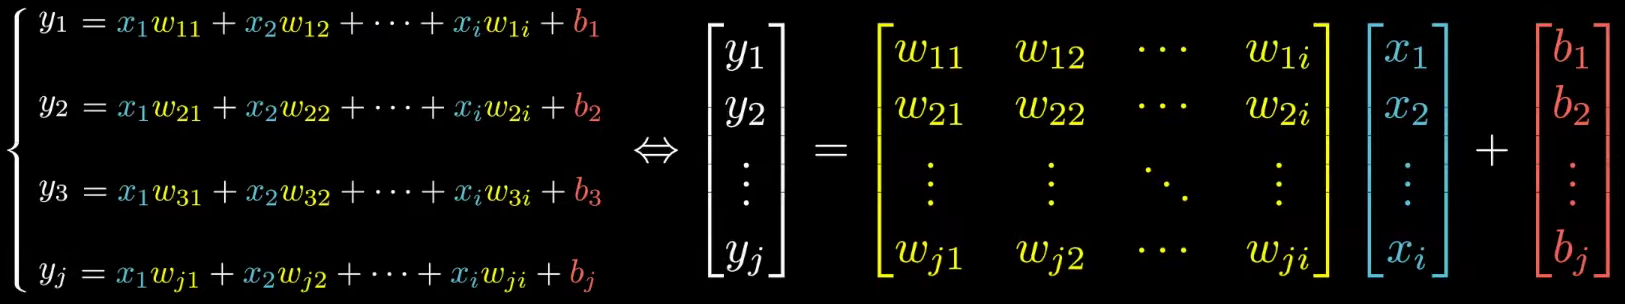

Т.е. вектор входных данных х (синий) умножается скалярно на вектор весов $w_j$(каждая строка в желтой матрице), складывается со смещением. Часто, для удобства и скорости вычислений, на нулевой позиции вектора входов ставят единицу, чтоб не записывать отдельно вектор b - он будет фигурировать в матрице весов как $w_{0j}$.

Функция активации обычно реализуется как отдельная сущность (слой), это связано с удобством вычисления градиента. В нашем задании пока не будем ее вычислять.

На вход система подает матрицу W  (список из списков с float) и вектор входных данных (список из float). Вам необходимо реализовать матрично-векторное умножение (по сути скалярное произведение между каждой строкой матрицы W и вектором входных данных. Результаты записать в список и отобразить на экран.

В случае, если количество столбцов (размер любой строки матрицы W) не равен размеру вектора входов - вывести "error".

Подробнее о геометрической интуиции за этим процессом можно посмотреть в этом [видео](https://youtu.be/RJCIYBAAiEI). Еще одной хорошей визуализацией является этот [сайт](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=3,1&seed=0.67368&showTestData=true&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false). Вы можете увидеть, что каждый нейрон есть просто разделяющая поверхность (гиперплоскость), принимающая на вход результаты разделения прошлого слоя (или входные данные). Запустив пример несколько раз, можно увидеть как используя всего 3 разделения можно получить более сложную форму (круг):

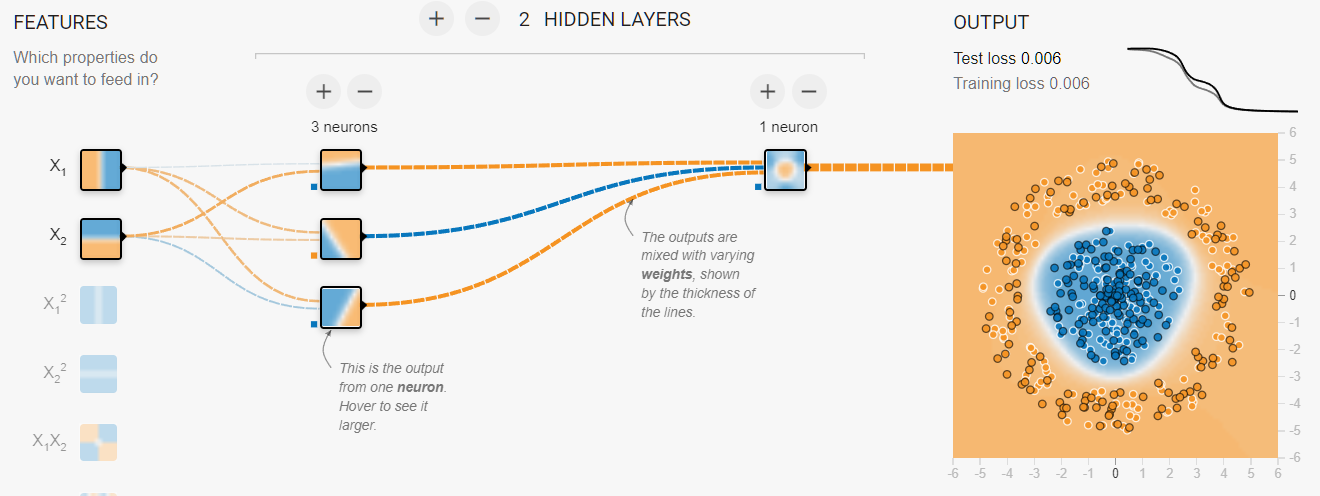

__Sample Input:__

1 2|1 2,3 4

__Sample Output:__

[5.0, 11.0]

In [99]:
# Не меняйте этот код! Он необходим для автоматической проверки решений.
a, b = input().split('|')
a = list(map(float, a.split()))
b = [list(map(float, e.split())) for e in b.split(',')]

# изменяйте только этот код
mv = []
if (len(b[0]) == len(a)) & (sum([len(b[i]) for i in range(len(b))]) % len(b[0]) == 0):
    for b_rows in range(len(b)):
        scalyar = 0
        for b_cols in range(len(b[0])):
            scalyar += b[b_rows][b_cols] * a[b_cols]
        mv.append(scalyar)
else:
    mv = 'error'

print(mv)

1 2|1 2,3 4
[5.0, 11.0]


В переменной data хранится список из фиксированного набора описаний (говорят категориальный признак). Отобразите в новой строке все уникальные элементы data и их количество по убыванию.

В анализе данных важно понимать, что модели, которые вы обучаете, часто основанны на несбалансированных данных. Так, например, если приблизительно то же распределение в признаковом описании не будет наблюдаться - нельзя гарантировать хорошую работу модели на новых данных. Простая аналогия: алгоритм выдачи рекламы, который видел только пользователей мужчин может совсем не угадывать предпочтения женской аудитории, что повлечет низкий процент кликов и, следственно, низкое качество его работы. По этой причине очень важно, чтобы новые данные брались из той же генеральной совокупности, что и при обучении алгоритма.

__Sample Input:__

признак_1 признак_1 признак_1 признак_1 признак_2 признак_2 признак_3

__Sample Output:__

4 признак_1

2 признак_2

1 признак_3

In [20]:
data = input().split()

lst = []
dct = {}
for i in data:
    if i not in lst:
        lst.append(i)
for j in lst:
    dct[j] = data.count(j)
for key, val in sorted(dct.items(), key=lambda x: x[1], reverse = True):
    print(val, key)

признак_2 признак_2 признак_8 признак_1 признак_1 признак_1 признак_3 признак_3
3 признак_1
2 признак_2
2 признак_3
1 признак_8


В блоке 3.2 Вы уже реализовывали скалярное произведение векторов, одну из ключевых операций в машинном обучении.

Обычно эта операция используется множество раз (например в матрично-векторных операциях), почему бы ее не автоматизировать? Система подставляет в переменные a, b списки, состоящие из float. Найти скалярное произведение dd векторов используя функцию:

<center>d = $\sum_{i=1}^{n}a_{i} \cdot b_{i}$
 
Размеры векторов должны совпадать: n = len(a) = len(b)

В случае, если они не совпадают - возвращать строку "error". (На самом деле вы можете вызвать срабатывание ошибки).

В ответе содержится float.
___
__Sample Input:__

0 0 1|20 21 30

__Sample Output:__

30.0

In [21]:
# Не меняйте этот код! Он необходим для автоматической проверки решений.
a, b = input().split('|')
# списки
a = list(map(float, a.split()))
b = list(map(float, b.split()))

# функция расчета скалярного произведения
def dot_product(a, b):
    # ваш код тут
    return sum([x * y for x, y in zip(a, b)]) if len(a) == len(b) else 'error'

# результат скалярного произведения векторов
# Не меняйте этот код! Он необходим для автоматической проверки решений.
print(dot_product(a, b))

0 0 1|20 21 30
30.0


Реализовать функцию, принимающую на вход вектор (список из float) и возвращает его L1 норму:

<center>$||l||_{1} = \sum_i |l_i|$

Для нахождения модуля можно использовать встроенную функцию abs. Результат в ответах во float.

Подробнее о применении можно прочесть [тут](https://towardsdatascience.com/intuitions-on-l1-and-l2-regularisation-235f2db4c261).
    
__Sample Input:__

1 -2 3

__Sample Output:__

6.0

In [28]:
# Не меняйте этот код! Он необходим для автоматической проверки решений.
a = [float(e) for e in input().split()]

# функция расчета l1 нормы вектора
def l1_norm(a):
    # ваш код тут
    return sum(abs(i) for i in a)

# Не меняйте этот код! Он необходим для автоматической проверки решений.
print(l1_norm(a))

1 -2 3
6.0


Одна из часто используемых функций глубокого обучения - [softmax](https://ru.wikipedia.org/wiki/Softmax). Она принимает на вход вектор l и возвращает softmax-вектор, где каждый i-й элемент определяется следующим образом:

<center>$SM(l_i) = \frac{exp(l_i)}{\sum_{j=0}^{len(l)}exp(l_j)}$
 
В качестве e полагайте 2.718281. Результат возвращайте в виде списка из float значений. На вход подется вектор (список) из float значений.

__Sample Input:__

1 2 3

__Sample Output:__

[0.09003061639242388, 0.2447285139578144, 0.6652408696497617]

In [43]:
# Не меняйте этот код! Он необходим для автоматической проверки решений.
a = [float(e) for e in input().split()]

# функция расчета softmax вектора
def softmax(a):
    # ваш код тут
    e = 2.718281
    summ = sum([2.718281 ** a[i] for i in range(len(a))])
    return [e ** a[i] / summ for i in range(len(a))]

# Не меняйте этот код! Он необходим для автоматической проверки решений.
print(softmax(a))

1 2 3
[0.09003061639242388, 0.2447285139578144, 0.6652408696497617]


Реализуйте класс matrix, который в своем конструкторе инициализирует матрицу (список из списков из float). 

Внутри класса реализуйте функцию mm, которая принимает на вход объект этого же класса. mm находит [матричное произведение](https://ru.wikipedia.org/wiki/%D0%A3%D0%BC%D0%BD%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86#:~:text=%D0%9E%D0%BF%D0%B5%D1%80%D0%B0%D1%86%D0%B8%D1%8F%20%D1%83%D0%BC%D0%BD%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B4%D0%B2%D1%83%D1%85%20%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%20%D0%B2%D1%8B%D0%BF%D0%BE%D0%BB%D0%BD%D0%B8%D0%BC%D0%B0,%D0%BE%D0%B4%D0%BD%D0%BE%D0%B3%D0%BE%20%D0%B8%20%D1%82%D0%BE%D0%B3%D0%BE%20%D0%B6%D0%B5%20%D0%BF%D0%BE%D1%80%D1%8F%D0%B4%D0%BA%D0%B0.) текущей матрицы (та, что в конструкторе) на переданную в функцию: 

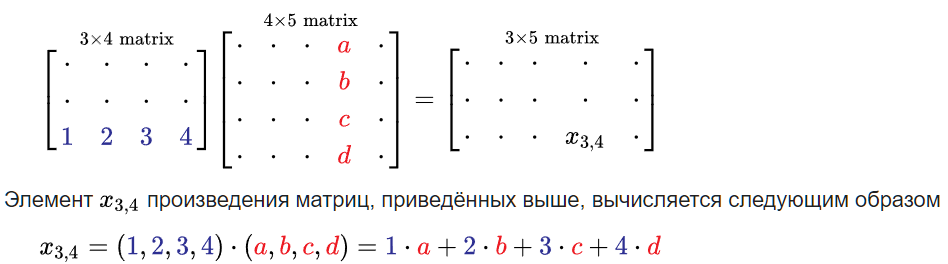

Результат возвращать в виде списка из списков.

Кроме этого внутри matrix реализовать функцию для отображения матрицы на экран строка за строкой. Т.е. [[1.,2.,3.], [4.,5.,6.]] будет отображено так:

[1.,2.,3.]

[4.,5.,6.]

В случае, если матрицы не согласованы (число столбцов в первой не равно числу строк во второй), возвращать при произведении "матрицы не согласованы".

На вход подаются две матрицы (списки из списков) a, b. Создайте из них объекты класса matrix и перемножьте по правилам матричного произведения. Результат преобразуйте в виде класса matrix. Отобразите объект класса (результат произведения) на экран.

В ответе используется float.

 

Отметим, что [геометрическая интуиция](https://youtu.be/tnjBY4Yq6mY) очень важна для понимания сути преобразования.

Подсказка ко 2 тесту: а Вы проверили, что все элементы матриц одного размера?

__Sample Input:__

1 2,3 4|1 2,3 4

__Sample Output:__

[7.0, 10.0]

[15.0, 22.0]

In [33]:
a, b = input().split('|')
a = [list(map(float, e.split())) for e in a.split(',')]
b = [list(map(float, e.split())) for e in b.split(',')]

class matrix():
    def __init__(self, m):
        self.m = m

    def mm(self, another_m):
        a_rows = len(self.m)
        a_cols = len(self.m[0])
        b_rows = len(another_m.m)
        b_cols = len(another_m.m[0])
        if sum([len(another_m.m[i]) for i in range(b_rows)]) % b_cols != 0:
            return 'матрицы не согласованы'
        
        M = []
        for i in range(a_rows):
            rows = []
            for j in range(b_cols):
                total = 0
                for _i in range(a_cols):
                    total += self.m[i][_i] * another_m.m[_i][j]
                rows.append(total)
            M.append(rows)
        return M

    # print(class_obj) отошлет нас сюда
    def __str__(self):
        out = []
        for i in range(len(self.m)):
            out.append(str(self.m[i]))
        return '\n'.join(out)

# преобразуем их в объект класса matrix
a = matrix(a)
b = matrix(b)
# результат произведения преобразуем в объект класса
result = a.mm(b)
# проверка на согласованность
if result == 'матрицы не согласованы':
    print(result)
else:
    mm = matrix(result)
    # распечатывем объект класса матрицы на экран
    print(mm)

11 12 , 21 22 | 11 12 , 21
матрицы не согласованы


Расширьте класс matrix из прошлой задачи фукнцией T транспонирования матрицы. Транспонирование - одна из часто используемых операций линейной алгебры, широко распространенная в алгоритмах машинного обучения:

[Транспонированная матрица](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B0%D0%BD%D1%81%D0%BF%D0%BE%D0%BD%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) — матрица $A^T$, полученная из исходной матрицы A заменой строк на столбцы:

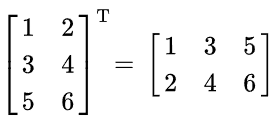

В случае, если в поступаемом на вход в конструктор класса списке количество строк или столбцов не совпадает с оными остальных срок/столбцов - в качестве объекта матрицы сохранять строку "неверное количество строк/столбцов". 

Создайте объект matrix из поступаемого на вход списка. Функция транспонирования T принимает на вход объект класса matrix и возвращает список состоящий из списков (транспонированная матрица). Результат выхода функции преобразовать в объект класса matrix, отобразить этот объект на экран.

 

Уже написанный код можно оптимизировать, например с помощью [@classmethod](https://webdevblog.ru/obyasnenie-classmethod-i-staticmethod-v-python/)

__Sample Input:__

1 2,3 4,5 6

__Sample Output:__

[1.0, 3.0, 5.0]

[2.0, 4.0, 6.0]

In [117]:
a = [list(map(float, e.split())) for e in input().split(',')]

class matrix():
    # конструктор, принимающий списки
    def __init__(self, m):
        self.m = m
    # матрица на матрицу
    def mm(self, another_m):
        ...

    # операция транспонирования
    def T(self):
        if sum([len(self.m[i]) for i in range(len(self.m))]) % len(self.m[0]) != 0:
            return ['неверное количество строк/столбцов']
        
        transpose = []
        for j in range(len(self.m[0])):
            rows = []
            for i in range(len(self.m)):
                rows.append(self.m[i][j])
            transpose.append(rows)
        return transpose

    # print(class_obj) отошлет нас сюда
    def __str__(self):
        out = []
        for i in range(len(self.m)):
            out.append(str(self.m[i]))
        return '\n'.join(out)

# преобразуем данные на вход в объект класса matrix
a = matrix(a)
if type(a.m)==str:
    print(a.m)
else:
    # результат транспонирования матрицы
    At = a.T()
    # преобразование в матрицу
    At = matrix(At)
    # распечатываем объект класса матрицы на экран
    print(At)

1 2,3 4,5
неверное количество строк/столбцов


Реализуйте декоратор check_size проверки формы матриц (списков из списков из float). Необходимо, чтобы функция инициализации объекта матрицы (create_matrix) с декоратором возвращала False, если число элементов всех внутренних списков было разным и True в противном случае.

__Sample Input:__

1 2,3 4, 5 6

__Sample Output:__

True

In [17]:
a = [list(map(float, e.split())) for e in input().split(',')]

def check_size(func):
    # ваш код тут
    def wrapper(funcz):
        if sum([len(funcz[i]) for i in range(len(funcz))]) % len(funcz[0]) != 0:
            return False
        else:
            return True
    return wrapper

@check_size
def create_matrix(a):
    # это мог быть конструктор вашего класса...
    matrix = a
    return matrix
    
print(create_matrix(a))

1 2, 3, 4 2
False


На вход подается целое четное число a. Реализуйте код, создающий numpy массив из значений [0 .. a) с помощью функционала numpy. Полученный массив преобразуйте в массив из 2 столбцов (к форме (a/2, 2)). К полученной последовательности добавьте слева вектор столбец из единиц. Отобразите на экран.

__Sample Input:__

6

__Sample Output:__

[[1. 0. 1.]

 [1. 2. 3.]
 
 [1. 4. 5.]]

In [42]:
import numpy as np
# не изменяйте этот код, он нужен для автоматической проверки
a = int(input())

matrix = np.array(np.arange(0, a).reshape(int(a/2), 2), float)
left_ones = np.ones(int(a/2)).reshape(int(a/2), 1)
transformed = np.concatenate([left_ones, matrix], axis = 1)

# не изменяйте этот код, он нужен для автоматической проверки
print(transformed)

6
[[1. 0. 1.]
 [1. 2. 3.]
 [1. 4. 5.]]


На вход подается numpy массив a и целое b. Возвращайте numpy массив, состоящий из индексов всех вхождений числа b в массив a.

__Sample Input:__

2,3 2 1 0

__Sample Output:__

[1]

In [53]:
import numpy as np
# не изменяйте этот код, он нужен для автоматической проверки
b, a = input().split(',')
b = int(b)
a = np.array([int(e) for e in a.split()])

indexes = []
for i in range(len(a)):
    if b == a[i]:
        indexes.append(i)
indexes = np.array(indexes)
# не изменяйте этот код, он нужен для автоматической проверки
print(indexes)

2,3 2 1 0
[1]


Градиентный спуск, один из наиболее часто используемых методов в обучении алгоритмов машинного обучения, зависит от масштаба значений входных данных. Одна из типичных операций на этапе подготовки данных - стандартизация.

Каждое входное значение из i-й строки j-го столбца матрицы признаковых описаний (двумерный нампай массив, строки - точки данных, столбцы - их признаковые описания) преобразуется по формуле:

<center>$x_{i,j} = \frac{x_{i, j} - \mu_j}{\sigma_j}$

${\mu_j}$ и ${\sigma_j}$ - среднее и стандартное отклонение признака (столбца) j. 

На вход подается двумерный numpy массив a. Отобразите на экран его стандартизированную версию.

 

Примечание: в реализации используется стандартное отклонение на основании смещённой оценки дисперсии, без -1 в знаменателе, в нотации numpy аргумент __ddof__ функции std равен нулю.

Примечание: алгоритмы машинного обучения реализуются для прогнозирования новых точек данных (из того же распределния что и существующая, историческая, выборка описанная признаковыми описаниями). Любые преобразования данных, которые вы производите с данными на этапе подготовки, должны быть произведены для любых новых точек (иначе масштаб входных чисел банально будет отличаться, при перемножении на веса получится шляпа). Таким образом целесообразно сохранять массивы средних и стандартных отклонений колонок (на диск или в переменную) для этапа прогнозов уже обученного алгоритма (/для деплоя).

__Sample Input:__

9
    
__Sample Output:__

[[-1.22474487 -1.22474487 -1.22474487]
    
 [ 0.          0.          0.        ]
    
 [ 1.22474487  1.22474487  1.22474487]]

In [65]:
import numpy as np
# не изменяйте этот код, он нужен для автоматической проверки
c = int(input())
a = np.arange(c).reshape(int(c/3), 3)

means = np.mean(a, axis = 0)
stds = np.std(a, axis = 0, ddof = 0)
a_std = (a - means) / stds

print(a_std)

9
[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]


Реализуйте формулу аналитического решения линейной регрессии.

В прошлых модулях мы несколько раз затрагивали линейные методы (классификации, логистическая регрессия). Тогда веса были заданы константами. В этом задании мы попробуем их найти с помощью аналитической формулы:

<center>$\vec{w} = (X^TX)^{-1} X^T \vec{y}$
 
Здесь Х - матрица объектов-признаков. Например строки этой матрицы могут быть ноутбуки, которые описываются объемом диска, количеством ядер процессора, объемом оперативной памяти. y - вектор ответов для каждой строки. Это показатель, который мы хотим предсказывать в дальнейшем, например цена ноутбука. Такую постановку задачи называют "обучением с учителем". Ее можно распространить на абсолютно любые по своей структуре данные. Например недвижимость: удаленность от центра, площадь, количество комнат, транспортная доступность, в качестве ответа та же цена. Так можно находить недооцененные за свои характеристики (признаковые описания) варианты. Еще примеры признаки-ответы: история последних 100 операций по карте - фрод/не фрод, крединтная история пользователя - вероятность отказа, скан кт легких (ярокости пикселей) - вероятность наличия болезни.

Прогноз линейной регрессии - скалярное произведение точки данных (ее признакового описания, т.е. строчки в двумерном нампай массиве) и весов: y = $\vec{w} \cdot \vec{x}$. Очевидно, что мы хотим, чтобы в среднем ошибка между прогнозами и реальными ответами была минимальна. В качестве ошибки (в задаче регрессии) часто используют квадратичную функцию потерь, откуда и следует вышеописанная формула, детальнее про это можно почтитать в доп. материалах по ссылке ниже.

Несмотря на простоту линейная регрессия очень распространена, ее можно встретить в самых разных областях: от банковской сферы до бионформатики.

В этой задаче на вход подается 2 объекта X и y. X - двумерная матрица объектов-признаков. Объекты в ней - разные характеристики домов в Калифорнии (оригинальный .csv можно найти [здесь](https://www.kaggle.com/datasets/camnugent/california-housing-prices%C2%A0)) y - их признаковое описание.

Используя наработки прошлых задач Вам необходимо стандартизовать данные и добавить к Х (слева) вектор столбец из единиц (для смещений). После реализовать формулу выше для нахождения w. После найти произведение признакового описания Х на найденный вектор весов w. Рассчитать среднеквадратичную ошибку:
<center>$MSE(preds, \hat y) = \frac{1}{n_{samples}} \sum_{i=1}^{n_{samples}} ( y_i - \hat y_i )^2$
 
Отобразить ее с точностью до 5 знака.

 

Примечание: для лучшего понимания материала крайне рекоомендуется ознакомится с материалом [статьи одс](https://habr.com/ru/company/ods/blog/323890/) и [геометрической интуицией](https://www.youtube.com/watch?v=3g-e2aiRfbU).

__Sample Input:__

__Sample Output:__

0.00982

In [74]:
import numpy as np
# попробуйте установить sklearn и запустить это у себя на компьютере локально 
# from sklearn.datasets import fetch_california_housing
# X, y = fetch_california_housing(return_X_y=True)

# Встроенный редактор не позволяет загружать данные из sklearn или через requests. Тут объявлено первые 10 строчек датасета в явном виде.
X = np.array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,1.02380952e+00,  3.22000000e+02,  2.55555556e+00,3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,9.71880492e-01,  2.40100000e+03,  2.10984183e+00,3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,1.07344633e+00,  4.96000000e+02,  2.80225989e+00,3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,1.07305936e+00,  5.58000000e+02,  2.54794521e+00,3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,1.08108108e+00,  5.65000000e+02,  2.18146718e+00,3.78500000e+01, -1.22250000e+02],
       [ 4.03680000e+00,  5.20000000e+01,  4.76165803e+00,1.10362694e+00,  4.13000000e+02,  2.13989637e+00,3.78500000e+01, -1.22250000e+02],
       [ 3.65910000e+00,  5.20000000e+01,  4.93190661e+00,9.51361868e-01,  1.09400000e+03,  2.12840467e+00,3.78400000e+01, -1.22250000e+02],
       [ 3.12000000e+00,  5.20000000e+01,  4.79752705e+00,1.06182380e+00,  1.15700000e+03,  1.78825348e+00,3.78400000e+01, -1.22250000e+02],
       [ 2.08040000e+00,  4.20000000e+01,  4.29411765e+00,1.11764706e+00,  1.20600000e+03,  2.02689076e+00,3.78400000e+01, -1.22260000e+02],
       [ 3.69120000e+00,  5.20000000e+01,  4.97058824e+00,9.90196078e-01,  1.55100000e+03,  2.17226891e+00,3.78400000e+01, -1.22250000e+02]])
# тут объявлено первые 10 ответов для первых 10 признаковых описаний
y = np.array([4.526, 3.585, 3.521, 3.413, 3.422, 2.697, 2.992, 2.414, 2.267, 2.611])

# стандартизация
X = (X - np.mean(X, axis = 0)) / np.std(X, axis = 0, ddof = 0)
# добавление единиц слева для смещения
X = np.concatenate([np.ones(10).reshape(10, 1), X], axis = 1)
# веса
w = np.linalg.inv(X.T @ X) @ X.T @ y
# прогнозы
preds = X.dot(w)
# среднеквадратичная ошибка
error = 0
for i in range(np.shape(y)[0]):
    error += (y[i] - preds[i]) ** 2
error = error * (1 / np.shape(y)[0])
print(round(error, 5))

0.00982


Пусть задан q - нампай массив координат (х, y) центра круга. r - его радиус (float). p1 и p2 - разные нампай массивы коодинат (х, y) точек, принадлежащих прямой. Если прямая (заданная p1, p2) не пересекает окружность - возвращать None. Если она пересекает окружность в 2 точках - возращать их координаты x, y (кортежем). Если точка пересечения одна - возвращать два (дублирующихся) кортежа с координатой этой точки х, y (кортежем).

In [ ]:
'''
q: np.array([x, y]) - circle center coords
r: float, circle radius
p1: np.array([x, y]) - left imadge edge
p2: np.array([x, y]) - right imadge edge
'''
def circle_line_intersection_points(q:np.array, r:float, p1:np.array, p2: np.array):
    v = p2-p1
    a = v.dot(v)
    b = 2 * v.dot(p1 - q)
    c = p1.dot(p1) + q.dot(q) - 2 * p1.dot(q) - r**2
    disc = b**2 - 4 * a * c

    if disc < 0:
        return None
    sqrt_disc = disc**0.5
    t1 = (-b + sqrt_disc) / (2 * a)
    t2 = (-b - sqrt_disc) / (2 * a)
    return (p1 + t1 * v), (p1 + t2 * v)